In [1]:
import numpy as np
np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
dataset = load_iris()
x = dataset.data[:, [0, 1]]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Datasets

In [4]:
from plotting import plot_dataset_1d_regr
from plotting import plot_dataset_2d_clf

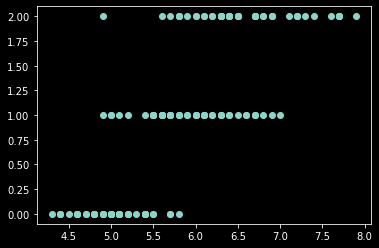

In [5]:
plot_dataset_1d_regr(x[:, [0]], y)

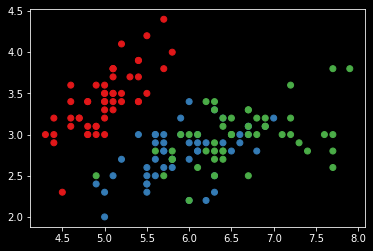

In [6]:
plot_dataset_2d_clf(x, y)

# Classification

In [7]:
from plotting import plot_decision_border
from sklearn.neighbors import KNeighborsClassifier

In [8]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

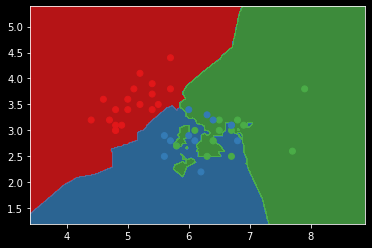

In [9]:
plot_decision_border(clf, x_test, y_test)

# Regression

In [10]:
from plotting import plot_regressor
from plotting import plot_residuals
from plotting import plot_poly_reg
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [11]:
dataset = fetch_california_housing()
x = dataset.data[:, [5]]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

C:\Users\Jan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fetch_california_housing is deprecated; `fetch_california_housing` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/dataset"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [12]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

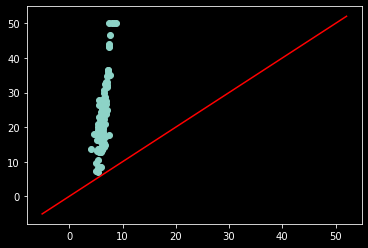

In [13]:
plot_regressor(regr, x_test, y_test)

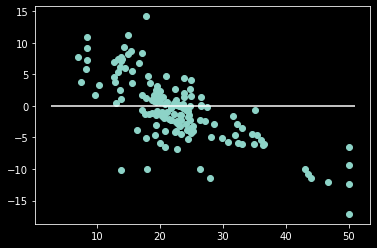

In [14]:
plot_residuals(regr, x_test, y_test)

In [15]:
pf = PolynomialFeatures(degree=2)
pf.fit(x_train)
x_train_transformed = pf.transform(x_train)
regr = LinearRegression()
regr.fit(x_train_transformed, y_train)

LinearRegression()

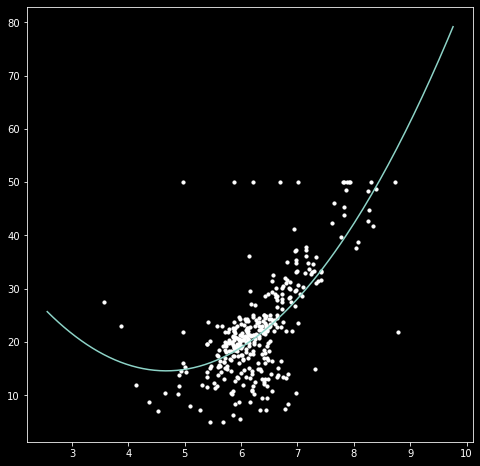

In [16]:
plot_poly_reg(regr, pf, x_train, y_train)

In [17]:
pf = PolynomialFeatures(degree=4)
pf.fit(x_train)
x_train_transformed = pf.transform(x_train)
regr = LinearRegression()
regr.fit(x_train_transformed, y_train)

LinearRegression()

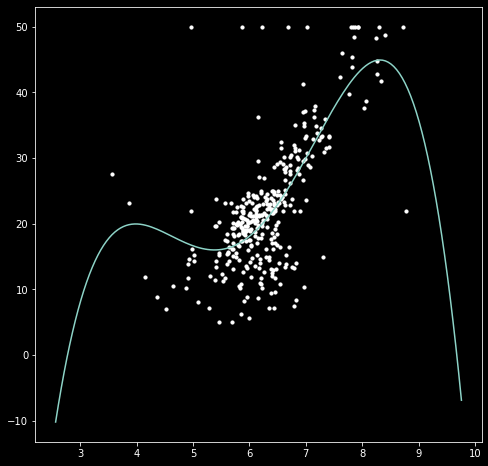

In [18]:
plot_poly_reg(regr, pf, x_train, y_train)

# Clustering

In [19]:
dataset = load_iris()
x = dataset.data[:, [0, 1]]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [20]:
from plotting import plot_kmeans
from plotting import plot_gmm
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [21]:
clus = KMeans(n_clusters=2)
clus.fit(x_train)

KMeans(n_clusters=2)

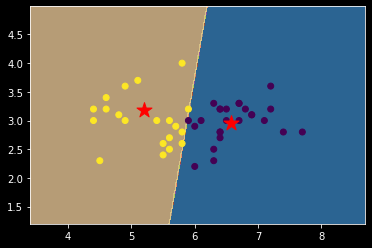

In [22]:
plot_kmeans(clus, x_test)

In [23]:
clus = GaussianMixture(n_components=2)
clus.fit(x_train)

GaussianMixture(n_components=2)

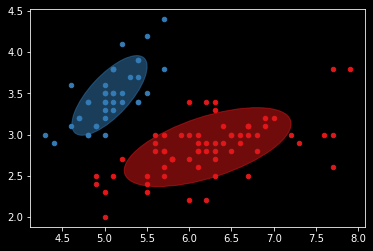

In [24]:
plot_gmm(clus, x_train)

# MISC

In [25]:
from plotting import plot_crossval
from plotting import plot_validation_curve
from plotting import plot_learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

In [26]:
scores = cross_val_score(
    regr,
    x_train,
    y_train,
    scoring="neg_mean_squared_error",
    cv=10
)

print(scores)

[-0.18064064 -0.17038614 -0.16072435 -0.3945224  -0.21298235 -0.30127354
 -0.28466133 -0.16716417 -0.13794112 -0.10104021]


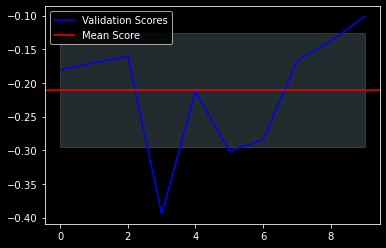

In [27]:
plot_crossval(scores)

In [28]:
param_range = range(1, 30)

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    x_train,
    y_train,
    param_name="n_neighbors", 
    param_range=param_range,
    cv=3,
    scoring="accuracy",
)

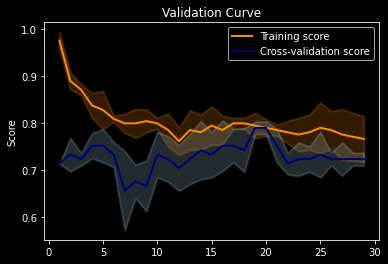

In [29]:
plot_validation_curve(train_scores, test_scores, param_range)

In [30]:
train_sizes, train_scores, test_scores = learning_curve(
        KNeighborsClassifier(),
        x_train,
        y_train,
        cv=10,
        n_jobs=-1
)

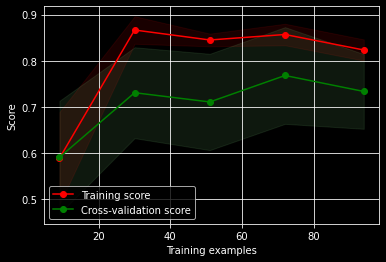

In [31]:
plot_learning_curve(train_sizes, train_scores, test_scores)